In [2]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import datetime
from datetime import datetime

# Modul A

In [19]:
# menggabungkan data

data1 = pd.read_csv('HD-Patients-3.csv')
data2 = pd.read_csv('HD-Patients-4.csv')

#gabung
frame = [data1,data2]
data = pd.concat(frame).drop_duplicates().reset_index(drop=True)

#ekspor data
data.to_csv(r'datasaya.csv',index=False)

# Modul B

In [20]:
#memanggil data
df = pd.read_csv('datasaya.csv')
df.head()

,id,ccf,age,sex,num
0,1262,0,37,1,1
1,1263,0,48,0,0
2,1264,0,37,0,0
3,1265,0,58,1,3
4,1266,0,39,1,0


In [60]:
df.shape

(294, 5)

In [21]:
#melihat kondisi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      294 non-null    int64
 1   ccf     294 non-null    int64
 2   age     294 non-null    int64
 3   sex     294 non-null    int64
 4   num     294 non-null    int64
dtypes: int64(5)
memory usage: 11.6 KB


In [22]:
#melihat apakah ada data yang kosong
df.isna().sum()

id     0
ccf    0
age    0
sex    0
num    0
dtype: int64

In [23]:
#cleaning
hapus=df.drop(["ccf"],axis=1)
hapus.head()

,id,age,sex,num
0,1262,37,1,1
1,1263,48,0,0
2,1264,37,0,0
3,1265,58,1,3
4,1266,39,1,0


In [24]:
#normalisasi
#digrub berdasarkan umur
df1_groupby_age=df.groupby("age")
df1_groupby_age["age"].count()

age
28     1
29     2
30     1
31     2
32     4
33     2
34     4
35     5
36     5
37     8
38     7
39    11
40     7
41    11
42     7
43    12
44     7
45     8
46    13
47    10
48    19
49    15
50    12
51     9
52    17
53    12
54    25
55    15
56    10
57     5
58     9
59     8
60     2
61     2
62     2
63     1
65     3
66     1
Name: age, dtype: int64

In [25]:
#digrub berdasarkan jeniskelamin
df1_groupby_age=df.groupby("sex")
df1_groupby_age["sex"].count()

sex
0     81
1    213
Name: sex, dtype: int64

In [45]:
#melihat rata-rata
hapus_x= hapus.groupby("age")
hapus_x.agg('mean')

,id,sex,num
age,,,
28,1084.000000,1.000000,0.000000
29,1130.500000,1.000000,0.000000
30,1092.000000,0.000000,0.000000
31,1194.500000,0.500000,0.500000
32,1179.750000,0.750000,0.500000
33,1170.500000,0.500000,0.500000
34,1157.250000,0.750000,0.250000
35,1181.600000,0.600000,0.200000
36,1185.800000,1.000000,0.200000


In [40]:
#selection
#mengurutkan data dari age,dan sex yang terbesar
hapus.sort_values(by=["age","sex"], ascending=False)

,id,age,sex,num
85,1211,66,1,3
28,1290,65,1,1
86,1212,65,1,3
100,1226,65,1,4
82,1208,63,1,1
...,...,...,...,...
204,1079,31,0,0
216,1092,30,0,0
171,1165,29,1,0
220,1096,29,1,0


In [41]:
#menampilkan umur yang di atas 40
umur = [hapus["age"] > 40]
umur

[0      False
 1       True
 2      False
 3       True
 4      False
        ...  
 289     True
 290    False
 291     True
 292     True
 293     True
 Name: age, Length: 294, dtype: bool]

In [42]:
#menampilkan umur di atas 40 dengan jenis kelaminnnya  
umur_jk = hapus.loc[df["age"] > 40,["sex"]]
umur_jk

,sex
1,0
3,1
5,1
6,0
7,0
...,...
288,1
289,0
291,1
292,0


In [59]:
#redudancy data
#menghapus data duplikat
hapus.drop_duplicates(subset="age",keep=False)

,id,age,sex,num
82,1208,63,1,1
85,1211,66,1,3
209,1084,28,1,0
216,1092,30,0,0


In [61]:
hapus.shape

(294, 4)

In [62]:
#menghapus data kosong
hapus.dropna()

,id,age,sex,num
0,1262,37,1,1
1,1263,48,0,0
2,1264,37,0,0
3,1265,58,1,3
4,1266,39,1,0
...,...,...,...,...
289,1053,48,0,0
290,1054,36,1,0
291,5001,48,1,0
292,5000,47,0,0


<AxesSubplot:>

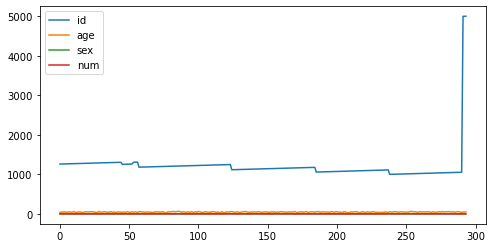

In [46]:
#visualisasi
#line
hapus.plot(kind='line', figsize=(8,4))

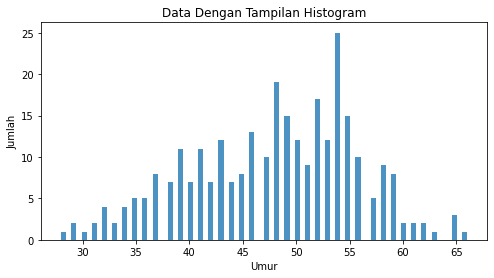

In [49]:
#histogram
hapus['age'].plot(kind='hist',figsize=(8,4), bins=80, alpha=0.80)
plt.title('Data Dengan Tampilan Histogram')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()
      


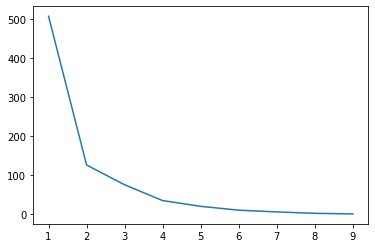

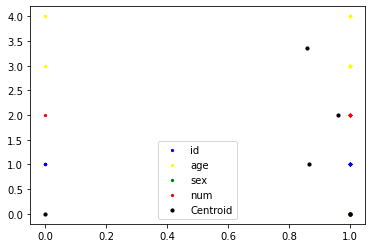

In [56]:
#dengan line per rows
df = pd.read_csv('datasaya.csv')
X= df.iloc[:, [3,4]].values

wcss=[]
for i in range (1,10):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.show()

kmeans= KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans=kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=5, c='blue', label='id')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=5, c='yellow', label='age')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=5, c='green', label='sex')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=5, c='red', label='num')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=10, c='black', label='Centroid')
plt.legend()
plt.show()
